In [10]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os
from pandas.io.json import json_normalize
import pyslha
pd.options.mode.chained_assignment = None #Disable copy warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [12]:
slhaFolder = './slha_IDM/'
#Get SLHA data:
slhaData = []
for slhaFile in glob.glob(slhaFolder+"/*.slha"):    
    slha = pyslha.readSLHAFile(slhaFile)
    parsDict = dict([[str(key),val] for key,val in slha.blocks['FRBLOCK'].items()])
    massDict = dict([[str(key),val] for key,val in slha.blocks['MASS'].items() if key >= 25])
    widthDict = dict([[str(key),val.totalwidth] for key,val in slha.decays.items() if key >= 25])
    xsec8TeV = dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=8000)])*1000] 
                 for proc in slha.xsections.values() if proc.get_xsecs(sqrts=8000)])
    xsec13TeV = dict([ [str(proc.pidsfinal).replace('[','').replace(']','').replace(',','_').replace(' ',''),
                   max([x.value for x in proc.get_xsecs(sqrts=13000)])*1000] 
                 for proc in slha.xsections.values() if proc.get_xsecs(sqrts=13000)])    
    slhaDict = {'filename' : os.path.basename(slhaFile), 'mass' : massDict, 'width' : widthDict, 
                'xsec8TeV(fb)' : xsec8TeV, 'xsec13TeV(fb)' : xsec13TeV, 'pars' : parsDict}
    slhaData.append(slhaDict)

In [13]:
#Convert to DataFrame
slhaDF = json_normalize(slhaData)
slhaDF = slhaDF.set_index('filename', drop=False)
#Add total cross-sections:
xsecs13 = [x for x in list(slhaDF) if 'xsec13TeV' in x]
xsecs8 = [x for x in list(slhaDF) if 'xsec8TeV' in x]
slhaDF['totalxsec13TeV(fb)'] = slhaDF[xsecs13].sum(axis=1)
slhaDF['totalxsec8TeV(fb)'] = slhaDF[xsecs8].sum(axis=1)

In [15]:
print(list(slhaDF))
print(slhaDF.shape)

['filename', 'mass.25', 'mass.35', 'mass.36', 'mass.37', 'pars.1', 'pars.2', 'pars.3', 'pars.4', 'pars.5', 'pars.6', 'width.25', 'width.35', 'width.36', 'width.37', 'xsec13TeV(fb).35_35', 'xsec13TeV(fb).35_36', 'xsec13TeV(fb).36_36', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)']
(4000, 20)


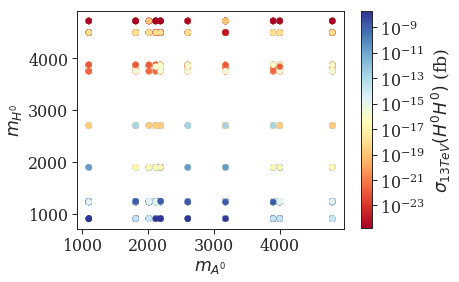

In [35]:
plt.figure()
# dataDF = slhaDF[slhaDF['pars.5'] == 1e-5]
dataDF = slhaDF
mHc = dataDF['mass.37']
mHA = dataDF['mass.36']
mH0 = dataDF['mass.35']
xsecH0H0 = dataDF['xsec13TeV(fb).35_35']
xsecA0H0 = dataDF['xsec13TeV(fb).35_36']
xsecA0A0 = dataDF['xsec13TeV(fb).36_36']
x,y,z = mHA,mH0,xsecH0H0
cp = plt.scatter(x,y, c=z, s=30, cmap=cm,norm=LogNorm(vmin=z.min(), vmax=z.max()))
cb = plt.colorbar(cp)
cb.set_label(r'$\sigma_{13TeV}(H^0 H^0)$ (fb)')
plt.xlabel(r'$m_{A^0}$')
plt.ylabel(r'$m_{H^0}$')
plt.show()

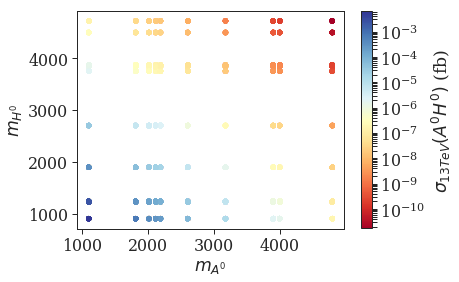

In [34]:
plt.figure()
mHc = dataDF['mass.37']
mHA = dataDF['mass.36']
mH0 = dataDF['mass.35']
xsecH0H0 = dataDF['xsec13TeV(fb).35_35']
xsecA0H0 = dataDF['xsec13TeV(fb).35_36']
xsecA0A0 = dataDF['xsec13TeV(fb).36_36']
x,y,z = mHA,mH0,xsecA0H0
cp = plt.scatter(x,y, c=z, s=20, cmap=cm,norm=LogNorm(vmin=z.min(), vmax=z.max()))
cb = plt.colorbar(cp)
cb.set_label(r'$\sigma_{13TeV}(A^0 H^0)$ (fb)')
plt.xlabel(r'$m_{A^0}$')
plt.ylabel(r'$m_{H^0}$')
plt.show()

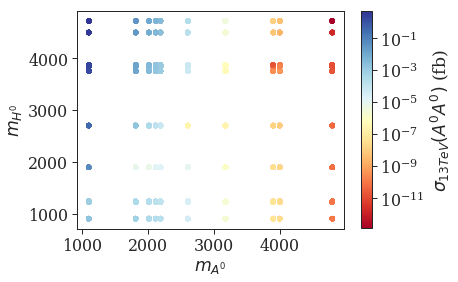

In [33]:
plt.figure()
mHc = dataDF['mass.37']
mHA = dataDF['mass.36']
mH0 = dataDF['mass.35']
xsecH0H0 = dataDF['xsec13TeV(fb).35_35']
xsecA0H0 = dataDF['xsec13TeV(fb).35_36']
xsecA0A0 = dataDF['xsec13TeV(fb).36_36']
x,y,z = mHA,mH0,xsecA0A0
cp = plt.scatter(x,y, c=z, s=20, cmap=cm,norm=LogNorm(vmin=z.min(), vmax=z.max()))
cb = plt.colorbar(cp)
cb.set_label(r'$\sigma_{13TeV}(A^0 A^0)$ (fb)')
plt.xlabel(r'$m_{A^0}$')
plt.ylabel(r'$m_{H^0}$')
plt.show()

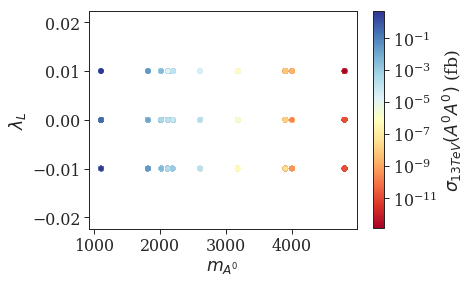

In [32]:
plt.figure()
mHc = dataDF['mass.37']
mHA = dataDF['mass.36']
mH0 = dataDF['mass.35']
lamL = dataDF['pars.5']
xsecH0H0 = dataDF['xsec13TeV(fb).35_35']
xsecA0H0 = dataDF['xsec13TeV(fb).35_36']
xsecA0A0 = dataDF['xsec13TeV(fb).36_36']

x,y,z = mHA,lamL,xsecA0A0
cp = plt.scatter(x,y, c=z, s=20, cmap=cm,norm=LogNorm(vmin=z.min(), vmax=z.max()))
cb = plt.colorbar(cp)
cb.set_label(r'$\sigma_{13TeV}(A^0 A^0)$ (fb)')
plt.xlabel(r'$m_{A^0}$')
plt.ylabel(r'$\lambda_L$')
plt.show()